In [1]:
import cv2
import numpy as np
from keras.models import load_model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [2]:
classes = ['Bad','Good']

In [3]:
import matplotlib.pyplot as plt

In [7]:
def model_load():
  transfer_model = load_model('/content/drive/MyDrive/vgg_cavity_new_99_90.h5')
  return transfer_model

def prediction(image_path):
  dim = (224,224)
  transfer_model = model_load()
  img = cv2.imread(image_path)
  plt.imshow(img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,dim) 
  img = preprocess_input(img)
  img = np.expand_dims(img,axis=0)
  prediction = transfer_model.predict(img)
  preds = np.argmax(prediction,axis=1)
  plt.title(classes[preds[0]])
  #print('Predicted class:',preds[0])

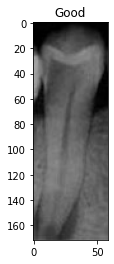

In [8]:
img_path = '/content/drive/MyDrive/Teeth_Cavity/model_test_images/bad/4.jpg'
prediction(img_path)

Found 10 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[0 0 0 0 0 1 1 1 1 0]


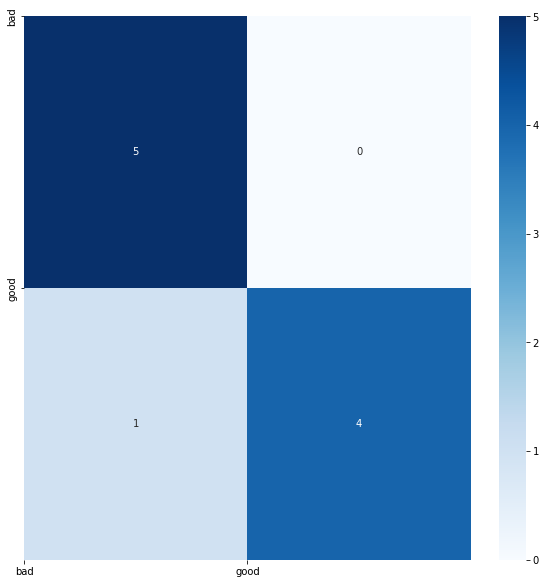

In [10]:
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import matplotlib.pyplot as plt
import seaborn as sns

def prediction_2():
  dataset_t = '/content/drive/MyDrive/Teeth_Cavity/model_test_images'
  img_height, img_width = 224, 224
  transfer_model = model_load()
  
  datagen =  keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
                                                        
  test_generator = datagen.flow_from_directory(dataset_t,
                                            batch_size=32,
                                            class_mode='categorical',
                                            target_size=(img_height, img_width),
                                            shuffle = False,
                                            seed=2)
  prediction = transfer_model.predict_generator(test_generator)
  preds = np.argmax(prediction,axis=1)
  print(preds)
  true_classes=test_generator.classes
  nb_categories = 2
  category_names = test_generator.class_indices.keys()
  plt.figure(figsize=(10,10))
  sns.heatmap(confusion_matrix(true_classes, preds), annot=True, cmap='Blues')
  plt.xticks(np.arange(nb_categories), category_names)
  plt.yticks(np.arange(nb_categories), category_names)
  
  plt.show()

prediction_2()